### Importación de librerias

In [3]:
import json
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Diccionario de cada archivo

- checkin.json      -->    Registros en el negocio
- review.json       -->    Contiene las reseñas completas, incluyendo el user_id que escribió el review y el business_id por el cual se escribe la reseña
- tip.json          -->    Consejos escritos por el usuario. Los tips son más cortas que las reseñas y tienden a dar sugerencias rápidas
- user.parquet      -->    Data del usuario incluyendo referencias a otros usuarios amigos y a toda la metadata asociada al usuario
- business.pkl      -->    Contiene información del comercio, incluyendo localización, atributos y categorías

Crear un funcion para analizar el tipo de datos proporcionados

In [4]:
# Funcion para revisar el tipo de dato de cada variable del dataset 
def tipo_datos(df):
    mi_dict = {"nombre_campo": [], "tipo_datos": []}
    for columna in df.columns:
        mi_dict["nombre_campo"].append(columna)
        mi_dict["tipo_datos"].append(df[columna].apply(type).unique())
    df_info = pd.DataFrame(mi_dict)
    return df_info

# Análisis EDA para el archivo "checkin"

In [5]:
# Leer el archivo JSON línea por línea y combinar los objetos en una lista
with open("Yelp/checkin.json", "r", encoding="utf-8") as file:
    data = [json.loads(line) for line in file]

df_checkin = pd.DataFrame(data)
df_checkin.head(5)

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


In [ ]:
df_checkin['business_id'] 

### Tipo de datos del df 

In [29]:
tipo_datos(df_checkin)

,nombre_campo,tipo_datos
0,business_id,[<class 'str'>]
1,date,[<class 'str'>]


# Análisis EDA para el archivo "review"

In [145]:
# Leer el archivo JSON línea por línea y combinar los objetos en una lista
with open("Yelp/review.json", "r", encoding="utf-8") as file:
    data = [json.loads(line) for line in file]

df_review = pd.DataFrame(data)
df_review.head(2)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18


In [180]:
df_review.shape

(6990280, 9)

### Tipo de datos del df 

In [24]:
tipo_datos(df_review)

,nombre_campo,tipo_datos
0,review_id,[<class 'str'>]
1,user_id,[<class 'str'>]
2,business_id,[<class 'str'>]
3,stars,[<class 'float'>]
4,useful,[<class 'int'>]
5,funny,[<class 'int'>]
6,cool,[<class 'int'>]
7,text,[<class 'str'>]
8,date,[<class 'str'>]


### Valores Faltantes

In [30]:
# Ordenamos los columnas por los que mas presentan valores faltantes 
df_review.isnull().sum().sort_values(ascending=False)

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

# Análisis EDA para el archivo "tip"

In [11]:
# Leer el archivo JSON línea por línea y combinar los objetos en una lista
with open("Yelp/tip.json", "r", encoding="utf-8") as file:
    data = [json.loads(line) for line in file]

df_tip = pd.DataFrame(data)
df_tip.head(2)

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0


### Tipo de datos del df 

In [26]:
tipo_datos(df_tip)

,nombre_campo,tipo_datos
0,user_id,[<class 'str'>]
1,business_id,[<class 'str'>]
2,text,[<class 'str'>]
3,date,[<class 'str'>]
4,compliment_count,[<class 'int'>]


### Valores Faltantes

In [31]:
# Ordenamos los columnas por los que mas presentan valores faltantes 
df_tip.isnull().sum().sort_values(ascending=False)

user_id             0
business_id         0
text                0
date                0
compliment_count    0
dtype: int64

# Análisis EDA para el archivo "user"

Puede ser necesaria las librerias 
- pip install pyarrow
- pip install fastparquet


In [14]:
# Cargar el archivo Parquet en un DataFrame de pandas con su ruta_archivo
ruta_archivo = "Yelp/user.parquet"

df_user = pd.read_parquet(ruta_archivo)
df_user.head(2)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946


### Tipo de datos del df 

In [27]:
tipo_datos(df_user)

,nombre_campo,tipo_datos
0,user_id,[<class 'str'>]
1,name,[<class 'str'>]
2,review_count,[<class 'int'>]
3,yelping_since,[<class 'str'>]
4,useful,[<class 'int'>]
5,funny,[<class 'int'>]
6,cool,[<class 'int'>]
7,elite,[<class 'str'>]
8,friends,[<class 'str'>]
9,fans,[<class 'int'>]


### Valores Faltantes

In [32]:
# Ordenamos los columnas por los que mas presentan valores faltantes 
df_user.isnull().sum().sort_values(ascending=False)

user_id               0
name                  0
compliment_writer     0
compliment_funny      0
compliment_cool       0
compliment_plain      0
compliment_note       0
compliment_list       0
compliment_cute       0
compliment_profile    0
compliment_more       0
compliment_hot        0
average_stars         0
fans                  0
friends               0
elite                 0
cool                  0
funny                 0
useful                0
yelping_since         0
review_count          0
compliment_photos     0
dtype: int64

# Análisis EDA para el archivo "business"

In [6]:
# Leer el archivo .pkl(pickle) a un archivo pd
df_business = pd.read_pickle('Yelp/business.pkl')

In [7]:
df_business.head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,NaN,85711,32.223236,-110.880452,3.5,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,4.5,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [274]:
df_business.to_excel('archivo.xlsx', index=False)

In [221]:
df_business.shape

(150346, 28)

In [222]:
df_business.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'business_id', 'name', 'address',
       'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars',
       'review_count', 'is_open', 'attributes', 'categories', 'hours'],
      dtype='object')

In [219]:
df_business.sample(10)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
46633,619zSo3GqKqskOwootFb5g,Rivertown,,Kenner,AZ,70062,29.985375,-90.252616,3.0,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51279,mw13aEz4GNkkFX7PPCOHdg,Island Way Pavers & Pools,101 1st St NW,Largo,NJ,33770,27.917746,-82.789425,1.5,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16215,W9-QlrChaA6IGe6QD0E6Wg,QwikResponse Restoration & Construction,165 Aero Camino Rd,Goleta,AZ,93117,34.432305,-119.848815,3.5,21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66107,mlbb2KTQraYHyD3F2gT1Og,Wilcox Nursery and Landscape,12501 Indian Rocks Rd,Largo,FL,33774,27.886738,-82.832127,4.0,21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25956,XbNR5dwJ3hvnxM3drtWoXQ,Precision Automotive,7300 W Victory Rd,Boise,FL,83709,43.576027,-116.272865,5.0,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18483,nKYpVtHmwzPBmVAlz73qoQ,Imli Indian Kitchen,769 E Passyunk Ave,Philadelphia,PA,19147,39.938869,-75.152472,4.0,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136504,OWL2B9wYz7w9DnD2JiLJ4Q,Jefferson Bucks Hospital,380 Oxford Valley Rd,Langhorne,MO,19047,40.183115,-74.867406,2.5,26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106865,zk_ZTJPmNplTOMmlv0bhPw,By the Sea,919 Linden Ave,Carpinteria,MO,93013,34.398716,-119.519099,2.0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139549,ASUthJLYb9KRBXy-hn70vA,Calypso Cafe,3307 Charlotte Ave,Nashville,MO,37209,36.152406,-86.824227,4.0,69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115629,m2SVUOW8PBS-JgGNoR0sNA,Sky Nails,4900 Pennell Rd,Aston,PA,19014,39.86241,-75.426531,2.0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Se procede a hacer el análisis especifico para la columna 'categories'

Puede ser necesaria la isntalacion de la liberia 
- pip install openpyxl


In [149]:
# Se observa que la columna categoria esta contiene datos anidados por ellos debemos separarlos
df_business['categories']

,categories,categories
0,"Doctors, Traditional Chinese Medicine, Naturop...",NaN
1,"Shipping Centers, Local Services, Notaries, Ma...",NaN
2,"Department Stores, Shopping, Fashion, Home & G...",NaN
3,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",NaN
4,"Brewpubs, Breweries, Food",NaN
...,...,...
150341,"Nail Salons, Beauty & Spas",NaN
150342,"Pets, Nurseries & Gardening, Pet Stores, Hobby...",NaN
150343,"Shopping, Jewelry, Piercing, Toy Stores, Beaut...",NaN
150344,"Fitness/Exercise Equipment, Eyewear & Optician...",NaN


 Observo que en un conteo rapido unicamente la primera columna es la relevante

In [150]:
df_business['categories'].count()

categories    150243
categories         5
dtype: int64

In [151]:
# Desanidar directamente en dos columnas la columnas 'Categorues'
categories_df = df_business['categories'].apply(pd.Series)

In [152]:
# Renombrar las nuevas columnas
categories_df.columns = ['categories1', 'categories2']

In [153]:
# Concatenar el DataFrame de categorías con el df_business
df_business = pd.concat([df_business, categories_df], axis=1)

In [154]:
df_business.head(1)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,categories1,categories2
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Doctors, Traditional Chinese Medicine, Naturop...",NaN


Observo que este separados

In [155]:
df_business['categories1']

0         Doctors, Traditional Chinese Medicine, Naturop...
1         Shipping Centers, Local Services, Notaries, Ma...
2         Department Stores, Shopping, Fashion, Home & G...
3         Restaurants, Food, Bubble Tea, Coffee & Tea, B...
4                                 Brewpubs, Breweries, Food
                                ...                        
150341                           Nail Salons, Beauty & Spas
150342    Pets, Nurseries & Gardening, Pet Stores, Hobby...
150343    Shopping, Jewelry, Piercing, Toy Stores, Beaut...
150344    Fitness/Exercise Equipment, Eyewear & Optician...
150345    Beauty & Spas, Permanent Makeup, Piercing, Tattoo
Name: categories1, Length: 150346, dtype: object

Ahora debo separa estas cadenas de texto en diferentes columnas, para ellos me creare un nuevo df donde trabajare aparte

In [156]:
df_categoria = df_business[['business_id','name','categories1']]
df_categoria

,business_id,business_id,name,name,categories1
0,Pns2l4eNsfO8kk83dixA6A,NaN,"Abby Rappoport, LAC, CMQ",NaN,"Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,NaN,The UPS Store,NaN,"Shipping Centers, Local Services, Notaries, Ma..."
2,tUFrWirKiKi_TAnsVWINQQ,NaN,Target,NaN,"Department Stores, Shopping, Fashion, Home & G..."
3,MTSW4McQd7CbVtyjqoe9mw,NaN,St Honore Pastries,NaN,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,mWMc6_wTdE0EUBKIGXDVfA,NaN,Perkiomen Valley Brewery,NaN,"Brewpubs, Breweries, Food"
...,...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,NaN,Binh's Nails,NaN,"Nail Salons, Beauty & Spas"
150342,c8GjPIOTGVmIemT7j5_SyQ,NaN,Wild Birds Unlimited,NaN,"Pets, Nurseries & Gardening, Pet Stores, Hobby..."
150343,_QAMST-NrQobXduilWEqSw,NaN,Claire's Boutique,NaN,"Shopping, Jewelry, Piercing, Toy Stores, Beaut..."
150344,mtGm22y5c2UHNXDFAjaPNw,NaN,Cyclery & Fitness Center,NaN,"Fitness/Exercise Equipment, Eyewear & Optician..."


Ocurre lo mismo para name y business_id, repito el proceso de categories. Observo que en un conteo rapido unicamente la primera columna es la relevante en ambos casos

In [157]:
df_categoria['name'].count()

name    150346
name         5
dtype: int64

In [158]:
df_categoria['business_id'].count()

business_id    150346
business_id         5
dtype: int64

Para la columna business_id

In [159]:
# Desanidar directamente en dos columnas la columnas 'Categorues'
df_id = df_categoria['business_id'].apply(pd.Series)
# Renombrar las nuevas columnas
df_id.columns = ['business_id1', 'business_id2']
# Concatenar el DataFrame de categorías con el df_business
df_categoria = pd.concat([df_categoria, df_id], axis=1)
df_categoria

,business_id,business_id,name,name,categories1,business_id1,business_id2
0,Pns2l4eNsfO8kk83dixA6A,NaN,"Abby Rappoport, LAC, CMQ",NaN,"Doctors, Traditional Chinese Medicine, Naturop...",Pns2l4eNsfO8kk83dixA6A,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,NaN,The UPS Store,NaN,"Shipping Centers, Local Services, Notaries, Ma...",mpf3x-BjTdTEA3yCZrAYPw,NaN
2,tUFrWirKiKi_TAnsVWINQQ,NaN,Target,NaN,"Department Stores, Shopping, Fashion, Home & G...",tUFrWirKiKi_TAnsVWINQQ,NaN
3,MTSW4McQd7CbVtyjqoe9mw,NaN,St Honore Pastries,NaN,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",MTSW4McQd7CbVtyjqoe9mw,NaN
4,mWMc6_wTdE0EUBKIGXDVfA,NaN,Perkiomen Valley Brewery,NaN,"Brewpubs, Breweries, Food",mWMc6_wTdE0EUBKIGXDVfA,NaN
...,...,...,...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,NaN,Binh's Nails,NaN,"Nail Salons, Beauty & Spas",IUQopTMmYQG-qRtBk-8QnA,NaN
150342,c8GjPIOTGVmIemT7j5_SyQ,NaN,Wild Birds Unlimited,NaN,"Pets, Nurseries & Gardening, Pet Stores, Hobby...",c8GjPIOTGVmIemT7j5_SyQ,NaN
150343,_QAMST-NrQobXduilWEqSw,NaN,Claire's Boutique,NaN,"Shopping, Jewelry, Piercing, Toy Stores, Beaut...",_QAMST-NrQobXduilWEqSw,NaN
150344,mtGm22y5c2UHNXDFAjaPNw,NaN,Cyclery & Fitness Center,NaN,"Fitness/Exercise Equipment, Eyewear & Optician...",mtGm22y5c2UHNXDFAjaPNw,NaN


Para la columna name

In [160]:
# Desanidar directamente en dos columnas la columnas 'Categorues'
df_name = df_categoria['name'].apply(pd.Series)
# Renombrar las nuevas columnas
df_name.columns = ['name1', 'name2']
# Concatenar el DataFrame de categorías con el df_business
df_categoria = pd.concat([df_categoria, df_name], axis=1)
df_categoria

,business_id,business_id,name,name,categories1,business_id1,business_id2,name1,name2
0,Pns2l4eNsfO8kk83dixA6A,NaN,"Abby Rappoport, LAC, CMQ",NaN,"Doctors, Traditional Chinese Medicine, Naturop...",Pns2l4eNsfO8kk83dixA6A,NaN,"Abby Rappoport, LAC, CMQ",NaN
1,mpf3x-BjTdTEA3yCZrAYPw,NaN,The UPS Store,NaN,"Shipping Centers, Local Services, Notaries, Ma...",mpf3x-BjTdTEA3yCZrAYPw,NaN,The UPS Store,NaN
2,tUFrWirKiKi_TAnsVWINQQ,NaN,Target,NaN,"Department Stores, Shopping, Fashion, Home & G...",tUFrWirKiKi_TAnsVWINQQ,NaN,Target,NaN
3,MTSW4McQd7CbVtyjqoe9mw,NaN,St Honore Pastries,NaN,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",MTSW4McQd7CbVtyjqoe9mw,NaN,St Honore Pastries,NaN
4,mWMc6_wTdE0EUBKIGXDVfA,NaN,Perkiomen Valley Brewery,NaN,"Brewpubs, Breweries, Food",mWMc6_wTdE0EUBKIGXDVfA,NaN,Perkiomen Valley Brewery,NaN
...,...,...,...,...,...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,NaN,Binh's Nails,NaN,"Nail Salons, Beauty & Spas",IUQopTMmYQG-qRtBk-8QnA,NaN,Binh's Nails,NaN
150342,c8GjPIOTGVmIemT7j5_SyQ,NaN,Wild Birds Unlimited,NaN,"Pets, Nurseries & Gardening, Pet Stores, Hobby...",c8GjPIOTGVmIemT7j5_SyQ,NaN,Wild Birds Unlimited,NaN
150343,_QAMST-NrQobXduilWEqSw,NaN,Claire's Boutique,NaN,"Shopping, Jewelry, Piercing, Toy Stores, Beaut...",_QAMST-NrQobXduilWEqSw,NaN,Claire's Boutique,NaN
150344,mtGm22y5c2UHNXDFAjaPNw,NaN,Cyclery & Fitness Center,NaN,"Fitness/Exercise Equipment, Eyewear & Optician...",mtGm22y5c2UHNXDFAjaPNw,NaN,Cyclery & Fitness Center,NaN


Selecciono las columnas finales en mi df_cat 

In [161]:
df_cat = df_categoria[['business_id1','name1','categories1']]
df_cat

,business_id1,name1,categories1
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,"Shipping Centers, Local Services, Notaries, Ma..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,"Department Stores, Shopping, Fashion, Home & G..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,"Brewpubs, Breweries, Food"
...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,"Nail Salons, Beauty & Spas"
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,"Pets, Nurseries & Gardening, Pet Stores, Hobby..."
150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"Shopping, Jewelry, Piercing, Toy Stores, Beaut..."
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,"Fitness/Exercise Equipment, Eyewear & Optician..."


Renombro las columnas 

In [162]:
df_cat = df_cat.rename(columns={'business_id1': 'business_id', 'name1': 'name', 'categories1': 'categories'})
df_cat

,business_id,name,categories
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,"Shipping Centers, Local Services, Notaries, Ma..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,"Department Stores, Shopping, Fashion, Home & G..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,"Brewpubs, Breweries, Food"
...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,"Nail Salons, Beauty & Spas"
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,"Pets, Nurseries & Gardening, Pet Stores, Hobby..."
150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"Shopping, Jewelry, Piercing, Toy Stores, Beaut..."
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,"Fitness/Exercise Equipment, Eyewear & Optician..."


In [163]:
tipo_datos(df_cat)

,nombre_campo,tipo_datos
0,business_id,[<class 'str'>]
1,name,[<class 'str'>]
2,categories,"[<class 'str'>, <class 'NoneType'>]"


In [164]:
# Filtrar los valores nulos en la columna 'categories'
filtered_categories = df_cat['categories'].dropna()

# Divide la columna 'categories' en una lista de strings separados por comas
categories_split = filtered_categories.str.split(',')
# Encuentra el número máximo de categorías en cualquier fila
max_categories = categories_split.apply(len).max()

# Crea un DataFrame con suficientes columnas para almacenar todas las categorías
new_columns = [f'category_{i+1}' for i in range(max_categories)]
categories_df = pd.DataFrame(categories_split.tolist(), columns=new_columns)

# Concatena el DataFrame de categorías con el DataFrame original
df_cat = pd.concat([df_cat, categories_df], axis=1)


In [165]:
df_cat.head(5)

,business_id,name,categories,category_1,category_2,category_3,category_4,category_5,category_6,category_7,...,category_27,category_28,category_29,category_30,category_31,category_32,category_33,category_34,category_35,category_36
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","Doctors, Traditional Chinese Medicine, Naturop...",Doctors,Traditional Chinese Medicine,Naturopathic/Holistic,Acupuncture,Health & Medical,Nutritionists,None,...,None,None,None,None,None,None,None,None,None,None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,"Shipping Centers, Local Services, Notaries, Ma...",Shipping Centers,Local Services,Notaries,Mailbox Centers,Printing Services,None,None,...,None,None,None,None,None,None,None,None,None,None
2,tUFrWirKiKi_TAnsVWINQQ,Target,"Department Stores, Shopping, Fashion, Home & G...",Department Stores,Shopping,Fashion,Home & Garden,Electronics,Furniture Stores,None,...,None,None,None,None,None,None,None,None,None,None
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",Restaurants,Food,Bubble Tea,Coffee & Tea,Bakeries,None,None,...,None,None,None,None,None,None,None,None,None,None
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,"Brewpubs, Breweries, Food",Brewpubs,Breweries,Food,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


Saber el numero de filas en mi df_cat

In [166]:
df_cat.shape[0]

150346

Ahora quiero ver los nulos por columas

In [167]:
df_cat.isnull().sum().sort_values(ascending=False)

category_36    150345
category_31    150345
category_27    150345
category_29    150345
category_30    150345
category_28    150345
category_32    150345
category_33    150345
category_34    150345
category_35    150345
category_26    150344
category_25    150343
category_24    150342
category_23    150340
category_22    150337
category_21    150334
category_20    150330
category_19    150320
category_18    150299
category_17    150258
category_16    150198
category_15    150110
category_14    149932
category_13    149559
category_12    148912
category_11    147829
category_10    145805
category_9     142207
category_8     136338
category_7     126149
category_6     109916
category_5      86466
category_4      60112
category_3      33047
category_2        484
categories        103
category_1        103
name                0
business_id         0
dtype: int64

Existen columnas que tiene demasiado nulos. Por ello me quedare con unicamente las columnas que tengas menos del 80% de nulos en sus columnas para el analisis

In [168]:
umbral = len(df_cat) * 0.8
columnas_nulos = df_cat.columns[df_cat.isnull().sum() < umbral]
columnas_nulos

Index(['business_id', 'name', 'categories', 'category_1', 'category_2',
       'category_3', 'category_4', 'category_5', 'category_6'],
      dtype='object')

Selecciono las columnas que deseo para mi df

In [169]:
df = df_cat[['business_id', 'name', 'category_1', 'category_2','category_3', 'category_4', 'category_5', 'category_6']]
df.head()

,business_id,name,category_1,category_2,category_3,category_4,category_5,category_6
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ",Doctors,Traditional Chinese Medicine,Naturopathic/Holistic,Acupuncture,Health & Medical,Nutritionists
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,Shipping Centers,Local Services,Notaries,Mailbox Centers,Printing Services,None
2,tUFrWirKiKi_TAnsVWINQQ,Target,Department Stores,Shopping,Fashion,Home & Garden,Electronics,Furniture Stores
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,Restaurants,Food,Bubble Tea,Coffee & Tea,Bakeries,None
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,Brewpubs,Breweries,Food,None,None,None


Quiero saber el numero total de palabras que hay en las columnas ['category_1', 'category_2', 'category_3', 'category_4', 'category_5', 'category_6']

In [170]:
# Selecciono las columnas
columnas_categorias = ['category_1', 'category_2', 'category_3', 'category_4', 'category_5', 'category_6']

In [171]:
# Combinar las columnas en una sola Serie
categorias_series = df[columnas_categorias].stack()

# Contar la longitud de la Serie (número total de palabras)
total_palabras = len(categorias_series)

# Mostrar el resultado
print("El número total de palabras en las columnas especificadas es:", total_palabras)

El número total de palabras en las columnas especificadas es: 611948


Ahora realizo el conteo de veces que repiten cada palabra

In [172]:
# Combinar las columnas en una sola Serie
categorias_series = df[columnas_categorias].stack()

# Contar la frecuencia de cada palabra
conteo_palabras = categorias_series.value_counts()

Observo las palabras que más se repiten

In [173]:
conteo_palabras

 Restaurants         34591
 Food                18908
 Shopping            16742
Restaurants          15290
 Home Services        9718
                     ...  
Observatories            1
Kitchen Supplies         1
 Hotel bar               1
Motorcycle Rental        1
 Trade Fairs             1
Name: count, Length: 2440, dtype: int64

In [174]:
conteo_palabras.head(10)

 Restaurants         34591
 Food                18908
 Shopping            16742
Restaurants          15290
 Home Services        9718
 Beauty & Spas        9270
 Nightlife            8466
 Health & Medical     8264
 Bars                 7717
 Local Services       7630
Name: count, dtype: int64

Me quedo con el top 10 de palabras

In [175]:
top_10_palabras = conteo_palabras.head(10)

#### Procedo a realizar las graficas pertinentes

Diagrama de Barras

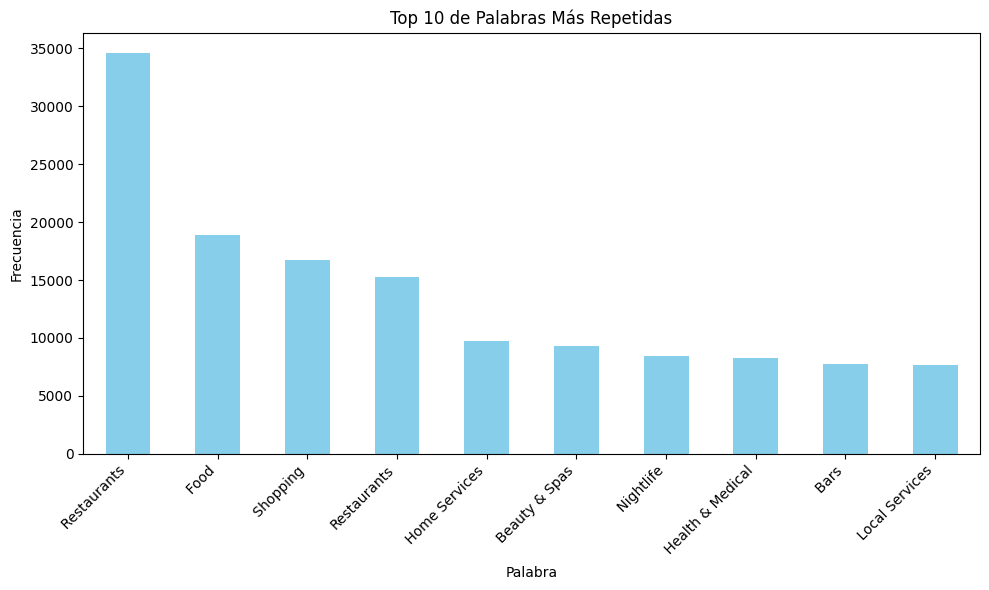

In [176]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
top_10_palabras.plot(kind='bar', color='skyblue')
plt.title('Top 10 de Palabras Más Repetidas')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Diagrama de torta con la participacion 

In [177]:
# Calcular los porcentajes del top 10 de palabras en relación con el total de palabras
porcentajes = (top_10_palabras / total_palabras) * 100

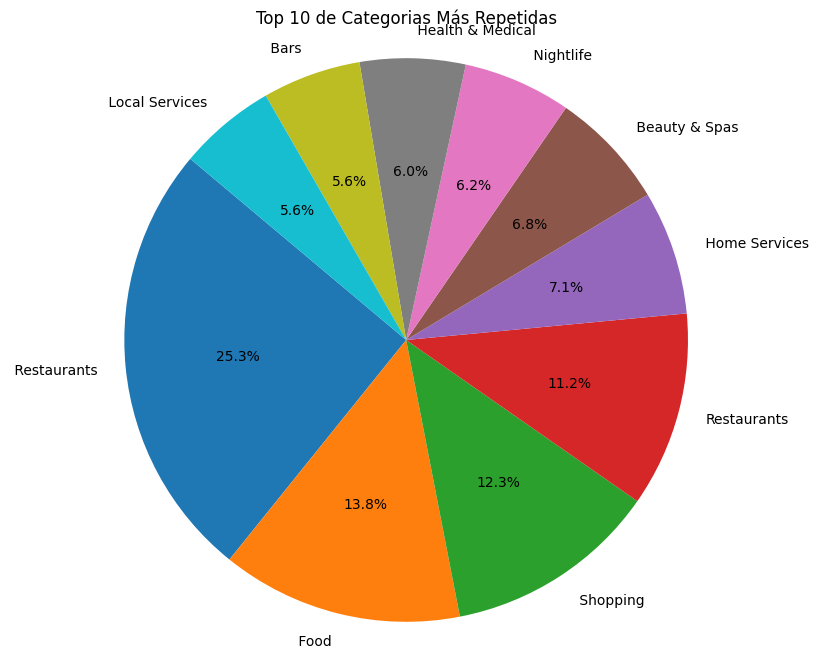

In [178]:
# Crear el diagrama de torta
plt.figure(figsize=(8, 8))
plt.pie(porcentajes, labels=porcentajes.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 de Categorias Más Repetidas')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Conclusiones iniciales: 

1. Se observa que en el top 10 aparecen como predominante 'Restaurants'.

2. A su vez los servicios similares como 'Food" y 'Restaurants ' estan en el top 5.

3. Del total de las categorias podiamos decir que el 50% son de un rubro de comidas o similar.

4. Vemos que la participacion del rubro de Gastronomia (Restaurants, Food, Nigthlife, Bars) es del 62.1% del total.


Análisis:

- Predominancia de la industria restaurantera: El hecho de que "Restaurants" aparezca predominantemente en el top 10 sugiere que la industria de servicios de alimentos tiene una presencia significativa en el mercado. Esto podría indicar una fuerte demanda de opciones de comida fuera de casa o un mercado saturado con numerosos establecimientos.

- Servicios similares en el top 5: La presencia de "Food" junto con "Restaurants" en el top 5 sugiere que las categorías relacionadas con la comida tienen una influencia importante en el mercado. Esto podría indicar una amplia variedad de opciones alimenticias disponibles para los consumidores o una preferencia generalizada por los servicios de comida en la industria de servicios comerciales.

- Alto porcentaje de categorías de comida: El hecho de que aproximadamente el 50% de las categorías estén relacionadas con la comida sugiere que este es un sector dominante en el mercado. Esto podría reflejar una cultura o preferencia de consumo particular en la región, donde la comida juega un papel central en la economía y la vida cotidiana.

- Dominio de la gastronomía en la participación total: El hecho de que las categorías relacionadas con la gastronomía representen el 62.1% del total sugiere que este sector tiene una presencia abrumadora en el mercado. Esto podría indicar una fuerte dependencia económica en la industria de servicios de alimentos y bebidas, lo que podría tener implicaciones tanto positivas como negativas en términos de diversificación económica y estabilidad financiera.

Posibles hipótesis que podrían explorarse con más datos o investigaciones adicionales podrían incluir:

1. La influencia de la cultura local en las preferencias de consumo y la proliferación de restaurantes y servicios de alimentos.

2. El impacto de las tendencias gastronómicas y de estilo de vida en el mercado de servicios comerciales.

3. La competencia entre diferentes categorías de comida y cómo esto afecta la distribución de participación en el mercado.

4. El papel de la ubicación geográfica y las características demográficas en la demanda de servicios comerciales, especialmente en el sector de la gastronomía.

Punto a considerar para seleccionar el rubro Gastronomico como principal objetivo:

1. Demanda sostenida: La presencia abrumadora de categorías relacionadas con la gastronomía en el mercado sugiere una demanda sostenida de servicios de alimentos y bebidas. Esto indica que hay un mercado establecido y continuo para explorar y capitalizar.

2. Crecimiento potencial: Aunque el mercado de la gastronomía ya es prominente, aún puede haber oportunidades de crecimiento y expansión. Esto podría ser a través de la introducción de nuevos conceptos de restaurantes, la innovación en la oferta de alimentos o la exploración de nichos de mercado específicos.

3. Competencia significativa: Dado que la gastronomía representa una parte considerable del mercado, existe una competencia significativa. Sin embargo, esto también indica que hay espacio para destacarse y diferenciarse mediante la oferta de productos o servicios únicos y de alta calidad.

4. Cultura y estilo de vida: La comida no solo es una necesidad básica, sino también una parte integral de la cultura y el estilo de vida de las personas. Al enfocarnos en la gastronomía, la empresa puede capitalizar esta conexión emocional y crear experiencias memorables para los clientes.

5. Diversificación de ingresos: Si bien la gastronomía puede ser competitiva, también ofrece oportunidades para diversificar los ingresos a través de diferentes segmentos del mercado, como restaurantes de lujo, comida rápida, catering, entrega a domicilio, entre otros.

6. Innovación y tendencias: La industria de la gastronomía es dinámica y está constantemente evolucionando con nuevas tendencias, ingredientes y conceptos. Al enfocarnos en este rubro, la empresa puede estar en la vanguardia de la innovación y adaptarse rápidamente a los cambios en las preferencias del consumidor.

### Se procede a hacer el análisis general para manejo del dataset

## Valores Nulos

In [261]:
df_business.head(1)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [262]:
df_b = df_business[['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'business_id', 'name', 'address',
       'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars',
       'review_count', 'is_open', 'attributes', 'categories', 'hours']]

In [263]:

def desanidar_columnas(df, columnas_anidadas):
    """
    Función para desanidar columnas anidadas en un DataFrame.
    
    Parámetros:
        - df: DataFrame que contiene las columnas anidadas.
        - columnas_anidadas: Lista de nombres de columnas anidadas a desanidar.
        
    Retorna:
        - DataFrame con las columnas anidadas desanidadas y renombradas.
    """
    print("Columnas en el DataFrame antes del desanidado:")
    print(df.columns)
    
    for columna in df.columns:
        if columna in columnas_anidadas:
            # Desanidar la columna
            df_desanidado = df[columna].apply(pd.Series)
            
            # Renombrar las nuevas columnas
            nuevas_columnas = [f"{columna}_{i+1}" for i in range(df_desanidado.shape[1])]
            df_desanidado.columns = nuevas_columnas
            
            # Concatenar el DataFrame desanidado con el DataFrame original
            df = pd.concat([df, df_desanidado], axis=1)
            
            # Eliminar la columna original anidada
            df.drop(columna, axis=1, inplace=True)
    
    print("\nColumnas en el DataFrame después del desanidado:")
    print(df.columns)
    
    return df

In [264]:
columnas_anidadas = ['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'business_id', 'name', 'address',
       'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars',
       'review_count', 'is_open', 'attributes', 'categories', 'hours']


In [266]:
df_b = df_b.loc[:,~df_b.columns.duplicated()]  

In [273]:
df_b_desanidado = desanidar_columnas(df_b, columnas_anidadas)

Columnas en el DataFrame antes del desanidado:
Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

Columnas en el DataFrame después del desanidado:
Index(['business_id_1', 'name_1', 'address_1', 'city_1', 'state_1',
       'postal_code_1', 'latitude_1', 'longitude_1', 'stars_1',
       'review_count_1', 'is_open_1', 'attributes_1', 'attributes_2',
       'attributes_3', 'attributes_4', 'attributes_5', 'attributes_6',
       'attributes_7', 'attributes_8', 'attributes_9', 'attributes_10',
       'attributes_11', 'attributes_12', 'attributes_13', 'attributes_14',
       'attributes_15', 'attributes_16', 'attributes_17', 'attributes_18',
       'attributes_19', 'attributes_20', 'attributes_21', 'attributes_22',
       'attributes_23', 'attributes_24', 'attributes_25', 'attributes_26',
       'attributes_27', 'attributes_28', 'attribut

In [268]:
df_b.shape

(150346, 14)

In [271]:
df_b.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,NaN,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


## Valores Faltantes

## Valores Duplicados

## Outliers